<img src='./img/top.jpg'></img>
<h1 align='center'>O DESASTRE DO TITANIC</h1>

Quando os tripulantes embarcaram no famoso RMS Titanic em Abril de 1912, é muito provável que eles não esperavam pelo fim trágico do transatlântico que partiu da Inglaterra em direção a Nova Iorque. O gigantesco navio que demorou quatro anos para ficar pronto, <a href='https://pt.wikipedia.org/wiki/RMS_Titanic'>afundou nas águas do Oceano Atlântico em 14 de Abril de 1912 quando colidiu as 23h40 contra um iceberg</a>.

Naquela noite, 1514 pessoas morreram, segundo a Junta Comercial Britânica¹. A tragédia serviu como base para a geração de diversas regras para maior segurança marítima, como garantir a presença de mais botes salva-vidas, que exercícios de emergência fossem propriamente realizados e que os equipamentos de rádio em navios comerciais fossem operados ininterruptamente. Para monitorar a presença de icebergs no Atlântico, foi criada a Patrulha Internacional do Gelo, cujo as regulações marítimas são realizadas pela <a href='https://pt.wikipedia.org/wiki/Conven%C3%A7%C3%A3o_Internacional_para_a_Salvaguarda_da_Vida_Humana_no_Mar'>Convenção Internacional para a Salvaguarda da Vida Humana no Mar</a>

<h1>Apresentando os dados</h1>

Esse estudo estará utilização dados coletados e tratados pela equipe da Udacity, o qual disponibilizou esse dataset <a href='https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download'> neste link</a>. Com base nas informações dispostas nesse dataset, realizarei Insights a cerca dos tripulantes e das circunstâncias que envolveram a tragédia. Vale lembrar que tal conjunto de dados não abriga informações de todos os passageiros, mas sim de apenas 891.

<h2>Data Cleaning e Data Wrangling</h2>

In [1]:
%matplotlib inline
import pandas as pd #biblioteca para criação de DataFrames
import matplotlib.pyplot as plt #plotagem
import random #seleção de valores aleatórios para plotagem

In [2]:
#leitura do arquivo csv contendo as informações dos tripulantes
titanic = pd.read_csv('titanic_data.csv')
print('Este dataset possui %s linhas e %s colunas' % (titanic.shape[0], titanic.shape[1]))
titanic.head()

Este dataset possui 891 linhas e 12 colunas


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Acima você pode conferir as primeiras linhas do dataset. As informações podem causar certa confusão no primeiro momento, portanto, vamos esclarecer alguns pontos sobre eles, a começar pela remoção de colunas que não usaremos, como a "PassengerId", "Cabin" e "Ticket", que contém informações sobre o código de identidade do passageiro, o número da sua cabine e do seu bilhete, respectivamente. Acredito que essas informações não são pertinentes ao estudo que faremos e sua permanência poderia causar perda de foco.

In [3]:
#removendo colunas que não serão utilizadas
titanic.drop(['Ticket','Cabin','PassengerId'], axis=1, inplace = True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Colunas removidas. Para deixar as informações mais claras a qualquer leitor, irei renomear as colunas remanescentes.

In [4]:
titanic.columns = ['Sobreviveu?','Classe','Nome','Sexo','Idade','Irmãos/Cônjuge','Pais/Crianças','Tarifa','Embarque']
titanic.head()

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


<h1>Dicionário de Dados:</h1>

Com as colunas devidamente renomeadas para um melhor entendimento, é hora de explicarmos o que cada um desses dados significa. Acompanhe abaixo cada coluna com seu respectivo significado:

<b>Sobreviveu?:</b> Informa se o passageiro sobreviveu ao desastre. 0 = Não; 1 = Sim<br>
<b>Classe:</b> Classe na qual o passageiro viajou. 1 = Primeira Classe; 2 = Segunda Classe; 3 = Terceira Classe<br>
<b>Nome:</b> Nome do passageiro<br>
<b>Sexo:</b> Sexo do passageiro<br>
<b>Idade:</b> Idade do passageiro<br>
<b>Irmãos/Cônjuge:</b> Informa a quantidade de irmãos e cônjuges que o paciente possuía na embarcação<br>
<b>Pais/Crianças:</b> Quantidade de crianças e idosos (pais) relativos ao passageiro<br>
<b>Tarifa:</b> Valor da passagem<br>
<b>Embarque:</b> Local onde o passageiro embarcou<br>

Algumas considerações importantes sobre esses dados: a classe do passageiro era caracterizada pelo local em que sua cabine ficava na embarcação. A Primeira Classe ficava na parte superior do Titanic, enquanto a Segunda ficava ao meio e a Terceira, considerada a menor das classes, ficava ao fundo da embarcação.

Você deve ter percebido que a idade do passageiro não é um número inteiro e isso é proposital. Passageiros que possuíam menos de um ano de vida tinham suas idades apresentadas em números decimais de acordo com os meses de vida, portanto, não irei alterar o tipo de dado desta tabela.

O Titanic parou em três locais diferentes para que seus passegeiros pudessem embarcar: Cherbourg, Queenstown e Southampton, representados pelas letras C, Q e S no <i>dataset</i>, respectivamente. Mais a frente deixaremos essa informação mais clara.

Continuando nossa tratativa dos dados, irei renomear os nomes das cidades em que o Titanic aportou para melhor entendimento, assim como alterar os valores da coluna de sobrevivente e sexo.

In [5]:
titanic['Embarque'] = titanic['Embarque'].replace(['S','Q','C'],['Southampton','Queenstown','Cherbourg'])
titanic['Sobreviveu?'] = titanic['Sobreviveu?'].replace([0,1],['Não','Sim'])
titanic['Sexo'] = titanic['Sexo'].replace(['male','female'],['Masculino','Feminino'])

titanic.head(6)

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton
5,Não,3,"Moran, Mr. James",Masculino,NaN,0,0,8.4583,Queenstown


Eu gostaria de saber como a linguagem Python está tratando estes dados, portanto, utilizarei o comando ```dtypes``` para tal.

In [6]:
#aparentemente está tudo em conformidade
titanic.dtypes

Sobreviveu?        object
Classe              int64
Nome               object
Sexo               object
Idade             float64
Irmãos/Cônjuge      int64
Pais/Crianças       int64
Tarifa            float64
Embarque           object
dtype: object

In [7]:
titanic.describe()

C:\Users\pvasconcellos\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Classe,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,NaN,0.000000,0.000000,7.910400
50%,3.000000,NaN,0.000000,0.000000,14.454200
75%,3.000000,NaN,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


A função ```describe``` permite saber rapidamente informações pertinentes nas colunas numericas do <i>dataset</i>. Por exemplo, verifique a linha "max", que informa os valores máximos encontrados em cada coluna. A maior faixa de idade presente no Titanic foram de pessoas com 80 anos. Há registros também de passageiro(s) que levaram consigo 8 pessoas, incluindo cônjuges e irmãos. Já quando falamos de pais e crianças, há registros de mais de 6 passageiros cadastrados para determinado(s) tripulantes.

Vale também ressaltar que um dos passegeiros mais jovens do Titanic possuía apenas 4 meses, como podemos visualizar na linha "min", além de que houveram registros de passageiros que não tiveram sua tarifa cobrada/registrada, mas isso é momento para mais a frente neste estudo.

<h2>Valores indevidos</h2>

Sem dúvidas você percebeu a mensagem de erro em vermelho acima. Isso se deve ao fato de haver valores não numéricos (NaN) na coluna idade, e isso influencia no cálculo dos quartis e mediana (vide linhas "25%", "50%" e "75%"). Mais a frente isso será relevante para esse estudo, portanto, definirei tais idades com o numeral 0.

In [8]:
titanic['Idade'].fillna(0, inplace = True)
titanic.head(6)

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton
5,Não,3,"Moran, Mr. James",Masculino,0.0,0,0,8.4583,Queenstown


In [9]:
titanic.describe()

,Classe,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,23.799293,0.523008,0.381594,32.204208
std,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,7.910400
50%,3.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Com sucesso, alteramos os valores indevidos e removemos os erros de cálculo de quartis.

<img src='./img/mid.jpg'></img>

<h1>Respondendo perguntas</h1>

Agora que temos nossos dados devidamente tratados e "limpos", é hora de criar e responder questionamentos a cerca dele. Dentre elas, gostaria de saber a resposta para as seguindas perguntas:
<br>
<br>
<li>Quantas pessoas sobreviveram ao desastre, segundo este <i>dataset</i>. Quantas não sobreviveram?</li>
<li>A classe em que o passageiro encontrava-se foi um fator decisivo para a sobrevivência?</li>
<li>Qual foi a proporção de homens e mulheres que sobreviveram a tragédia?</li>
<li>Quem são os passageiros que não tiveram sua tarifa cobrada? Eles sobreviveram?</li>

Vamos ao nosso primeiro questionamento. Primeiro, a proporção de sobreviventes ao desastre.

In [10]:
#cores para serem usadas nos gráficos
cores = [
         ['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
         ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
         ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
         ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
         ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
         ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
         ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
        ]

#criei esta coluna para realizar contagem dos dados rapidamente usando a função sum()
titanic['CONTAGEM'] = 1

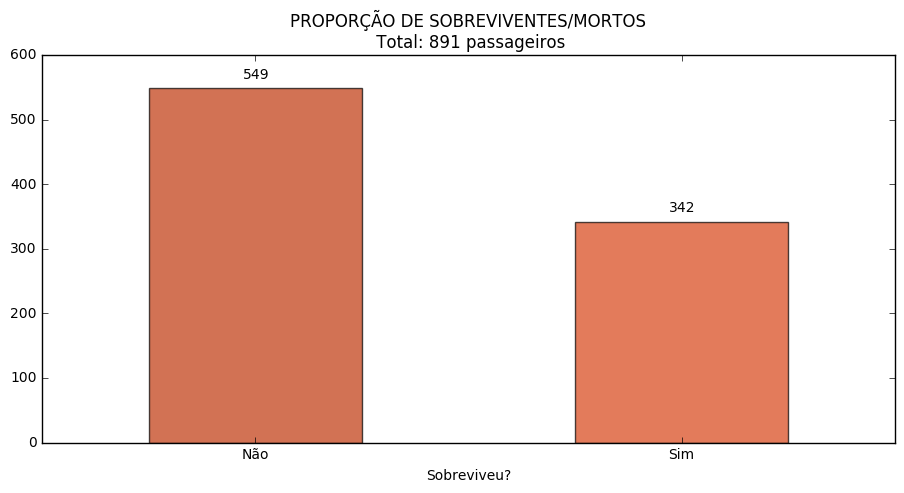

In [16]:
sobreviventes = titanic.groupby('Sobreviveu?')['CONTAGEM'].sum().plot(kind='bar', rot=0 , color=random.choice(cores), alpha=.7, figsize=(11,5))

#posicionando valores acima das barras
for p in sobreviventes.patches:
    b=p.get_bbox()
    sobreviventes.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.title('PROPORÇÃO DE SOBREVIVENTES/MORTOS\n Total: %s passageiros' % (titanic.shape[0]))
plt.show()

A má notícia é que a maioria dos passageiros presentes no Titanic não sobreviveram ao desastre. Ainda seguindo essa linha de pensamento: sabemos que durante desastres e situações emergênciais, mulheres e crianças são os primeiros a serem evacuados. Seria interessante saber se a proporção de sobreviventes se deve apenas de mulheres e crianças. Vamos conferir:

Vale lembrar que a maioridade na Inglaterra no século XX - que persiste até hoje - <a href='http://super.abril.com.br/historia/qual-a-idade-da-maioridade/'>é de 10 anos</a>. Contudo, darei uma margem de mais cinco anos para incluirmos passageiros estrangeiros e outras condições.

In [12]:
prioritarios = (titanic['Idade'] < 15) | (titanic['Sexo'] == 'Feminino')
prioritarios = titanic[prioritarios]
prioritarios.head(10)

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque,CONTAGEM
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg,1
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton,1
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton,1
5,Não,3,"Moran, Mr. James",Masculino,0.0,0,0,8.4583,Queenstown,1
7,Não,3,"Palsson, Master. Gosta Leonard",Masculino,2.0,3,1,21.0750,Southampton,1
8,Sim,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Feminino,27.0,0,2,11.1333,Southampton,1
9,Sim,2,"Nasser, Mrs. Nicholas (Adele Achem)",Feminino,14.0,1,0,30.0708,Cherbourg,1
10,Sim,3,"Sandstrom, Miss. Marguerite Rut",Feminino,4.0,1,1,16.7000,Southampton,1
11,Sim,1,"Bonnell, Miss. Elizabeth",Feminino,58.0,0,0,26.5500,Southampton,1
14,Não,3,"Vestrom, Miss. Hulda Amanda Adolfina",Feminino,14.0,0,0,7.8542,Southampton,1


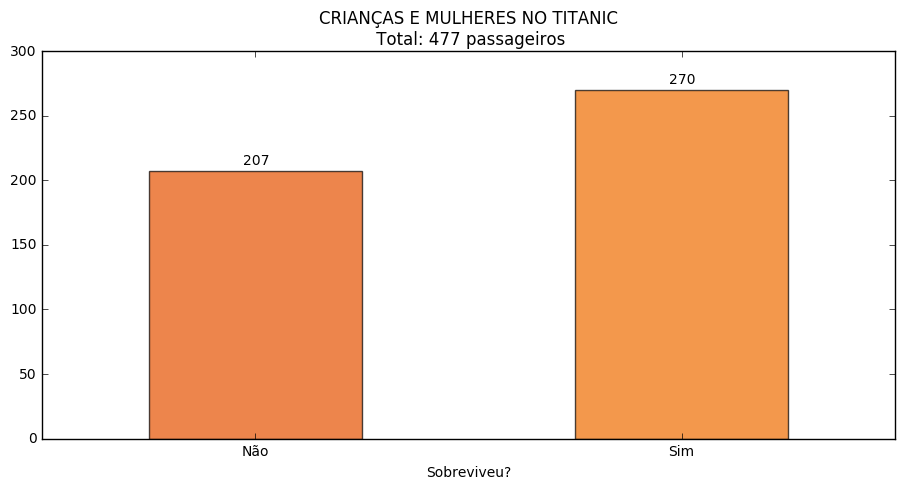

In [13]:
prioritarios_sobreviventes = prioritarios.groupby('Sobreviveu?')['CONTAGEM'].sum().plot(kind='bar', color=random.choice(cores), alpha=.7, figsize=(11,5))

#posicionando valores acima das barras
for p in prioritarios_sobreviventes.patches:
    b=p.get_bbox()
    prioritarios_sobreviventes.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 5))

plt.title('CRIANÇAS E MULHERES NO TITANIC\n Total: %s passageiros' % (prioritarios.shape[0]))
plt.xticks(rotation=0)
plt.show()

Nossa próxima pergunta a responder é: <b>A classe em que o passageiro encontrava-se foi um fator decisivo para a sobrevivência?</b><br>
Para tal, agruparei os dados nas três categorias e criarei um gráfico para melhor visualização. Acompanhe:

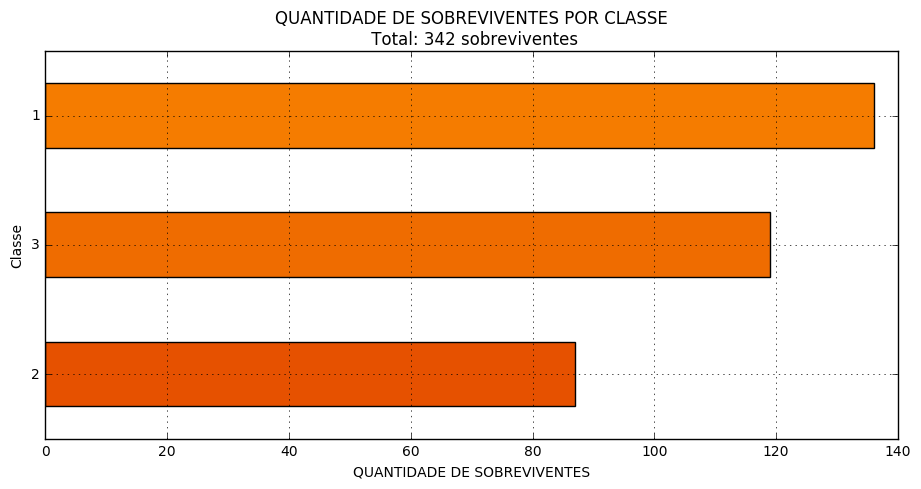

In [14]:
#filtrando o dataset para conter dados apenas de pessoas que sobreviveram
classe_sobrevivente = titanic[titanic['Sobreviveu?'] == 'Sim'].groupby('Classe')['CONTAGEM'].sum().sort_values(ascending=True)
classe_sobrevivente.plot(kind='barh', figsize=(11,5), color=random.choice(cores), rot=0, grid=True)

plt.title('QUANTIDADE DE SOBREVIVENTES POR CLASSE\n Total: %s sobreviventes' % (classe_sobrevivente.sum()))
plt.xlabel('QUANTIDADE DE SOBREVIVENTES')
plt.show()

Como era de se esperar, a primeira classe possui a maior quantidade de sobreviventes, visto que suas cabines situavam-se na parte superior do navio, local este próximo aos botes salva-vidas. Todavia, um fato interessante é que houveram mais sobreviventes na terceira classe do que na segunda (cerca de 40 sobreviventes a mais), o que impressiona devido a classe mais baixa ficar situada justamente na inferior do Titanic.
Duas teorias poderiam explicar o motivo desses dados. A primeira é a de que este <i>dataset </i> tenha coletado mais sobreviventes da terceira classe do que da segunda, já que este arquivo trata-se de uma amostra do conjunto de dados completos sobre a tragédia. A segunda teoria é de que o <i>iceberg</i> pode ter colidido com o meio do transatlântico, local que abrigava as cabines da segunda classe.

Nossos dois últimos questionamentos giram em torno das idades dos passageiros e os passageiros que não tiveram cobrança de suas passagens.

Comecemos com as idades. Incluindo pessoas que sobreviveram ou não, quais foram as faixas de idade presentes nesta trágica viagem?

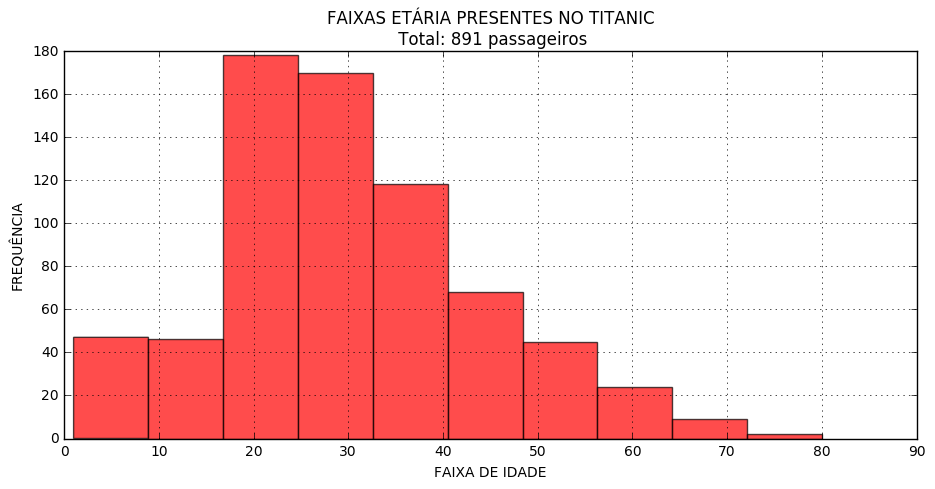

In [20]:
idades = titanic[titanic['Idade'] >= 1]['Idade'].astype(int).hist(bins=10, figsize=(11,5), color='red', alpha=.7)

plt.title('FAIXAS ETÁRIA PRESENTES NO TITANIC\n Total: %s passageiros' % (titanic['CONTAGEM'].sum()))
plt.xlabel('FAIXA DE IDADE')
plt.ylabel('FREQUÊNCIA')
plt.show()

Excluindo passageiros que não tiveram suas idades registradas (sinalizadas com o número "0"), a maioria dos passageiros presentes no Titanic tinham entre 18 e 32 anos de idade. A partir deste último, a frequência diminuia ao decorrer da faixa de idade.

Por último, vamos identificar quem eram os passageiros que não tiveram sua passagem cobrada. Seriam eles parte da tripulação?

In [26]:
passagem_gratuita = titanic[titanic['Tarifa'] == 0].reset_index(drop=True)
passagem_gratuita

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque,CONTAGEM
0,Não,3,"Leonard, Mr. Lionel",Masculino,36.0,0,0,0.0,Southampton,1
1,Não,1,"Harrison, Mr. William",Masculino,40.0,0,0,0.0,Southampton,1
2,Sim,3,"Tornquist, Mr. William Henry",Masculino,25.0,0,0,0.0,Southampton,1
3,Não,2,"Parkes, Mr. Francis ""Frank""",Masculino,0.0,0,0,0.0,Southampton,1
4,Não,3,"Johnson, Mr. William Cahoone Jr",Masculino,19.0,0,0,0.0,Southampton,1
5,Não,2,"Cunningham, Mr. Alfred Fleming",Masculino,0.0,0,0,0.0,Southampton,1
6,Não,2,"Campbell, Mr. William",Masculino,0.0,0,0,0.0,Southampton,1
7,Não,2,"Frost, Mr. Anthony Wood ""Archie""",Masculino,0.0,0,0,0.0,Southampton,1
8,Não,3,"Johnson, Mr. Alfred",Masculino,49.0,0,0,0.0,Southampton,1
9,Não,1,"Parr, Mr. William Henry Marsh",Masculino,0.0,0,0,0.0,Southampton,1


Dos 15 passageiros que não tiveram sua passagem cobrada (ou informada), apenas um sobreviveu. Realizando pesquisas a cerca dos nomes, percebi que muitos deles tratavam-se de tripulantes do Titanic, como <a href='https://www.geni.com/people/Lionel-Leonard/6000000016211210238'>Leonard, Mr. Lionel</a> e <a href='https://www.geni.com/people/William-Cahoone-Johnson-jr/6000000016207818906'>Johnson, Mr. William Cahoone Jr</a>, ambos marinheiros que morreram durante a tragédia. O único sobrevivente deste grupo também fazia parte da tripulação. <a href='https://www.geni.com/people/William-Henry-T%C3%B6rnquist/6000000015947610959'>Tornquist, Mr. William Henry</a> sobreviveu a tragédia quando tinha 25 anos e morreu apenas em 1946 (aos 60 anos de idade) de problemas cardíacos. Já os passageiros que tiveram gratuidade na viagem, como <a href='https://www.geni.com/people/William-Henry-Harrison/6000000016152065209'>Harrison, Mr. William</a> e <a href='https://www.geni.com/people/John-Richard-Fry/6000000016142357235'>Fry, Mr. Richard</a>, tratavam-se de membros que ou não tiveram suas passagens cobradas ou informadas.

<h1>Conclusão</h1>

O Naufrágio do Titanic não foi a primeira nem será a última tragédia a ocorrer na história da humanidade. Assim como em outros eventos passados, tentamos nos reerguer novamente, aprendendo lições importantes e evitando que novos episódios surjam. Além de questões filosóficas acerca da fragilidade da vida ou da implacabilidade da natureza sobre o homem, o Naufrágio do Titanic nos mostra que não importa o quão grande algo possa ser, a queda e ruína podem chegar até mesmo aos gigantes.

<h1>Bibliografia</h1>

¹Bingham, John (1999). The Loss of the Titanic, 1912 (Londres: The Stationery Office). p. 197. ISBN 978-0-11-702403-8
https://pt.wikipedia.org/wiki/RMS_Titanic<br>
https://pt.wikipedia.org/wiki/Conven%C3%A7%C3%A3o_Internacional_para_a_Salvaguarda_da_Vida_Humana_no_Mar<br>
https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download<br>
http://super.abril.com.br/historia/qual-a-idade-da-maioridade/<br>
https://www.geni.com/people/Lionel-Leonard/6000000016211210238<br>
https://www.geni.com/people/William-Cahoone-Johnson-jr/6000000016207818906<br>
https://www.geni.com/people/William-Henry-T%C3%B6rnquist/6000000015947610959<br>
https://www.geni.com/people/William-Henry-Harrison/6000000016152065209<br>
https://www.geni.com/people/John-Richard-Fry/6000000016142357235<br>